<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [599]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [600]:
data = r'C:\Users\Acer\OneDrive\Pulpit\STUDIA1\sem5\AiBD\lab9\laboratorium-9-maksymrzepka-main/'
df = pd.read_csv(f'{data}data.csv', sep=',')
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [601]:
#categorical = ...
categorical_str = [var for var in df.columns if df[var].dtype=='O']
categorical_num = [var for var in df.columns if df[var].dtype!='O']

print('Dane tektowe zawierają kolumny :\n\n', categorical_str)
print('Dane liczbowe zawierają kolumny :\n\n', categorical_num)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Dane liczbowe zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [602]:
str = df[categorical_str].isnull().sum()
num = df[categorical_num].isnull().sum()
print('     str','\n', str)
print('\n')
print('     num','\n', num)

     str 
 workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64


     num 
 age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


In [603]:
for var in categorical_str: 
    value = df[var].value_counts()
    print(value, '\n')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

In [604]:
print('workclass')
print(df.workclass.unique())
print('occupation')
print(df.occupation.unique())
print('native_country')
print(df.native_country.unique())

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
native_country
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [605]:
df['workclass'].replace('?', np.NaN, inplace=True)
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [606]:
df['occupation'].replace('?', np.NaN, inplace=True)
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [607]:
df['native_country'].replace('?', np.NaN, inplace=True)
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [608]:
df[categorical_str].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [609]:
num = df[categorical_num].head()
value = df[categorical_num].isnull().sum()
print(num,'\n', value)

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40 
 age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [610]:
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany


In [611]:
y_train

32098      >50K
25206     <=50K
23491      >50K
12367     <=50K
7054      <=50K
          ...  
13123      >50K
19648     <=50K
9845      <=50K
10799      >50K
2732      <=50K
Name: income, Length: 22792, dtype: object

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [612]:
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteri

In [613]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
32098,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [614]:
X_train.shape

(22792, 108)

In [615]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
22278,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [616]:
X_test.shape

(9769, 108)

In [617]:
scaler = RobustScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [618]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [619]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [620]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [621]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb_fit = gnb.fit(X_train, y_train)
print(gnb_fit)


GaussianNB()


In [622]:
y_pred = gnb.predict(X_test)
print(y_pred)
print('\nModel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' <=50K']

Model accuracy score: 0.7973


In [623]:
y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('\nTraining-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' >50K' ' <=50K']

Training-set accuracy score: 0.8000


In [624]:
print('\nTraining set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('\nTest set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set score: 0.8000

Test set score: 0.7973


In [625]:
print(y_test.value_counts())
null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

 <=50K    7407
 >50K     2362
Name: income, dtype: int64
Null accuracy score: 0.7582


In [626]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5871 1536]
 [ 444 1918]]

True Positives(TP) =  5871

True Negatives(TN) =  1918

False Positives(FP) =  1536

False Negatives(FN) =  444


<AxesSubplot: >

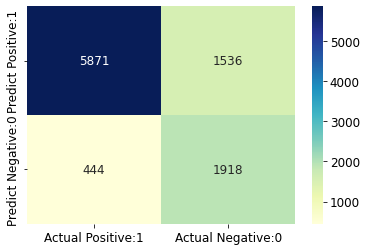

In [627]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [628]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999142e-01, 8.57760845e-07],
       [9.99533817e-01, 4.66183444e-04],
       [1.08913495e-01, 8.91086505e-01],
       [1.16224146e-04, 9.99883776e-01],
       [5.48957611e-09, 9.99999995e-01],
       [8.26561599e-01, 1.73438401e-01],
       [9.99999953e-01, 4.72058728e-08],
       [9.99990230e-01, 9.77045245e-06],
       [9.86799779e-01, 1.32002208e-02],
       [9.99999994e-01, 6.00402301e-09]])

In [629]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999991e-01,8.577608e-07
1,9.995338e-01,4.661834e-04
2,1.089135e-01,8.910865e-01
3,1.162241e-04,9.998838e-01
4,5.489576e-09,1.000000e+00
5,8.265616e-01,1.734384e-01
6,1.000000e+00,4.720587e-08
7,9.999902e-01,9.770452e-06
8,9.867998e-01,1.320022e-02
9,1.000000e+00,6.004023e-09


In [630]:
# gnb.predict_proba(X_test)[0:10, 1]

In [631]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

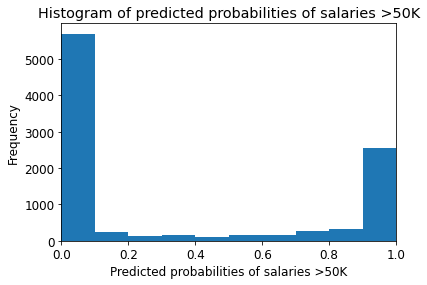

In [632]:
import matplotlib.pyplot as plt 
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

**race**

In [633]:
X = df.drop(['race'], axis=1)
y = df['race'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,7298,0,60,United-States,>50K
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,Female,1831,0,38,United-States,<=50K
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,0,50,United-States,>50K
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,Male,0,0,40,Guatemala,<=50K
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,Male,0,0,25,Germany,<=50K


In [634]:
y_train.head()

32098     White
25206     White
23491     White
12367     White
7054      White
Name: race, dtype: object

In [635]:
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'income'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteri

In [636]:
# df['workclass'].replace('?', np.NaN, inplace=True)
# df.workclass.value_counts()

In [637]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
# gnb

y_pred = gnb.predict(X_test)
print(y_pred)
print('\nModel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('\nTraining-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('\nTraining-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


y_pred_prob = gnb.predict_proba(X_test)

print('\nTraining set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('\nTest set score: {:.4f}'.format(gnb.score(X_test, y_test)))

[' White' ' White' ' White' ... ' White' ' White' ' White']

Model accuracy score: 0.8479
[' White' ' White' ' White' ... ' White' ' White' ' White']

Training-set accuracy score: 0.8369
[' White' ' White' ' White' ... ' White' ' White' ' White']

Training-set accuracy score: 0.8369

Training set score: 0.8369

Test set score: 0.8479


In [638]:
cm = confusion_matrix(y_test, y_pred)
print('\nTrue Positives (TP) = ', cm[0,0])
print('\nTrue Negatives (TN) = ', cm[1,1])
print('\nFalse Positives (FP) = ', cm[0,1])
print('\nFalse Negatives (FN) = ', cm[1,0])


True Positives (TP) =  0

True Negatives (TN) =  2

False Positives (FP) =  1

False Negatives (FN) =  0


<AxesSubplot: >

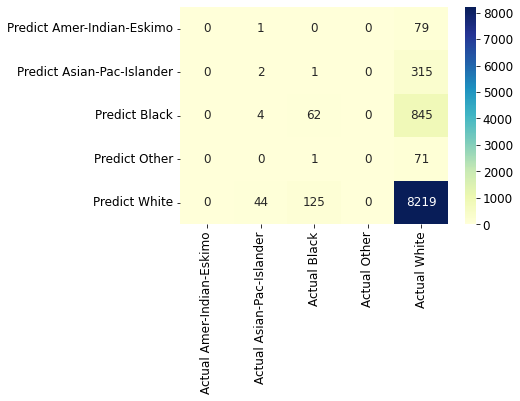

In [639]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Amer-Indian-Eskimo', 'Actual Asian-Pac-Islander', 'Actual Black', 'Actual Other', 'Actual White'], 
                                 index=['Predict Amer-Indian-Eskimo', 'Predict Asian-Pac-Islander', 'Predict Black', 'Predict Other', 'Predict White'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

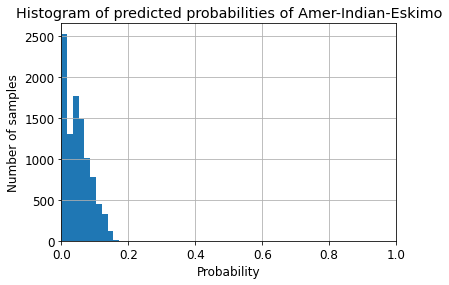

In [640]:
y_pred_1 = gnb.predict_proba(X_test)[:, 0]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_1, bins = 10)
plt.title('Histogram of predicted probabilities of Amer-Indian-Eskimo')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

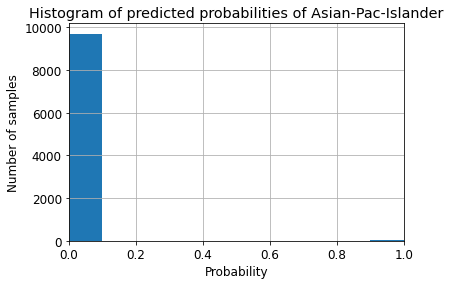

In [641]:
y_pred_2 = gnb.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_2, bins = 10)
plt.title('Histogram of predicted probabilities of Asian-Pac-Islander')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

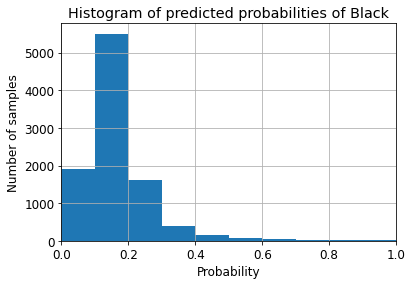

In [642]:
y_pred_3 = gnb.predict_proba(X_test)[:, 2]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_3, bins = 10)
plt.title('Histogram of predicted probabilities of Black')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

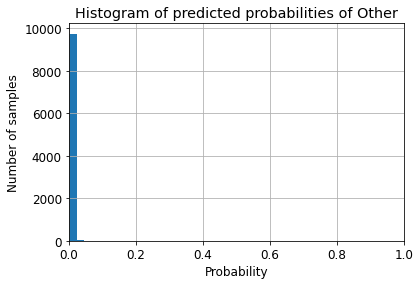

In [643]:
y_pred_4 = gnb.predict_proba(X_test)[:, 3]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_4, bins = 10)
plt.title('Histogram of predicted probabilities of Other')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()


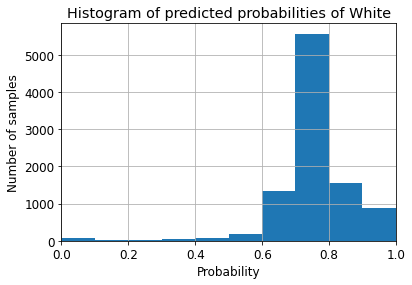

In [644]:
y_pred_5 = gnb.predict_proba(X_test)[:, 4]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_5, bins = 10)
plt.title('Histogram of predicted probabilities of White')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()


**native_country**

In [645]:
X = df.drop(['native_country'], axis=1) 
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,>50K
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,<=50K
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,>50K
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,<=50K
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,Local-gov,33331,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,>50K
19648,44,Private,98466,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,<=50K
9845,23,Private,45317,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,<=50K
10799,45,Local-gov,215862,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,>50K


In [646]:
y_train

32098     United-States
25206     United-States
23491     United-States
12367         Guatemala
7054            Germany
              ...      
13123     United-States
19648     United-States
9845      United-States
10799     United-States
2732      United-States
Name: native_country, Length: 22792, dtype: object

In [647]:
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteri

In [648]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()

# fit the model
gnb_fit = gnb.fit(X_train, y_train)
print(gnb_fit)

GaussianNB()


In [649]:
y_pred = gnb.predict(X_test)
print(y_pred)
print('\nModel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


[' Hong' ' Hong' ' Hong' ... ' United-States' ' Hong' ' Hong']

Model accuracy score: 0.0564


In [650]:
y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('\nTraining-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

[' United-States' ' United-States' ' Yugoslavia' ... ' Hong'
 ' United-States' ' Jamaica']

Training-set accuracy score: 0.0557


In [651]:
print('\nTraining set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('\nTest set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set score: 0.0557

Test set score: 0.0564


In [652]:
cm = confusion_matrix(y_test, y_pred)
print('\nTrue Positives (TP) = ', cm[0,0])
print('\nTrue Negatives (TN) = ', cm[1,1])
print('\nFalse Positives (FP) = ', cm[0,1])
print('\nFalse Negatives (FN) = ', cm[1,0])


True Positives (TP) =  0

True Negatives (TN) =  0

False Positives (FP) =  0

False Negatives (FN) =  0


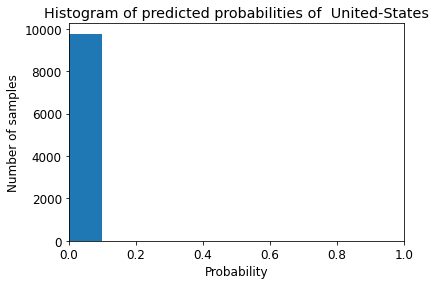

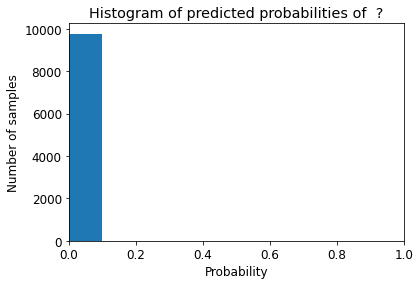

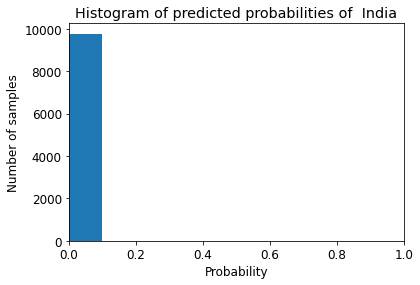

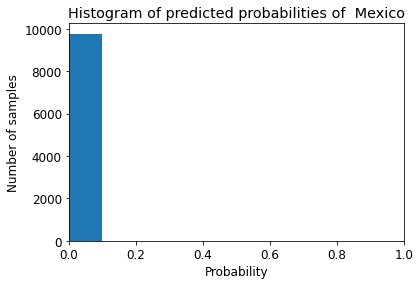

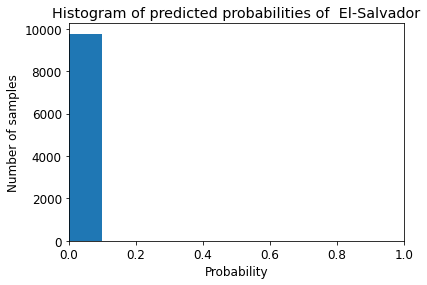

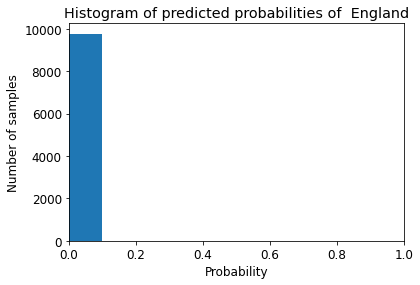

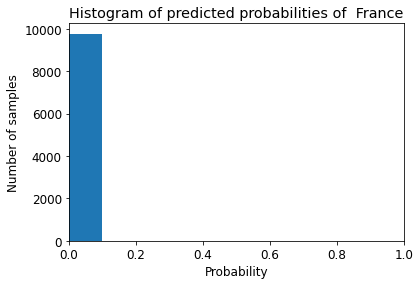

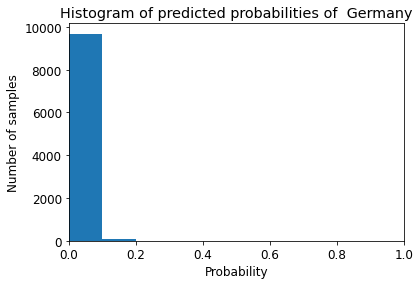

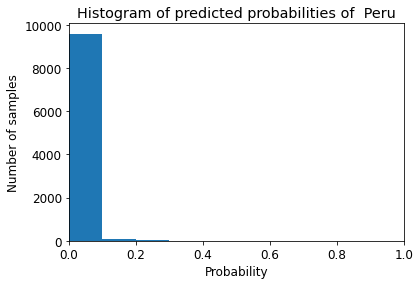

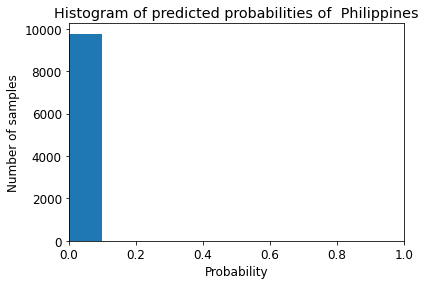

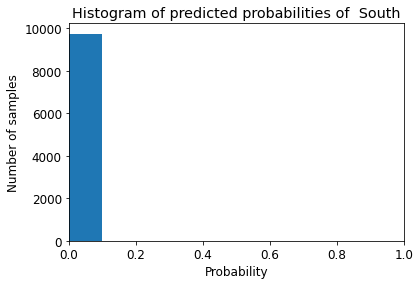

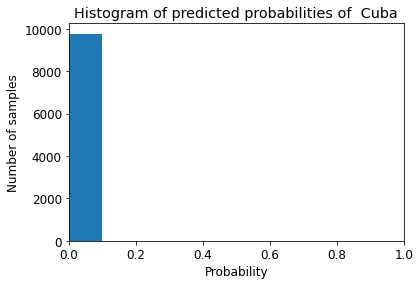

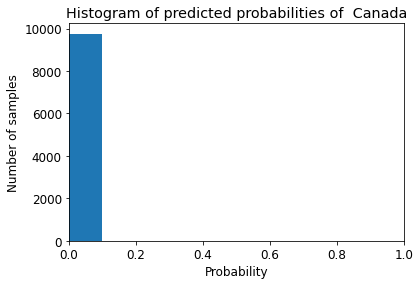

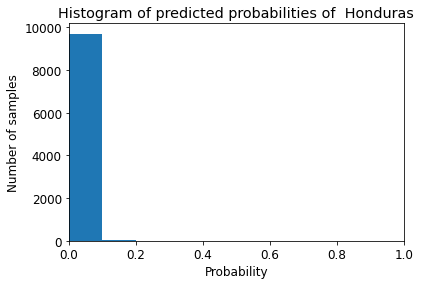

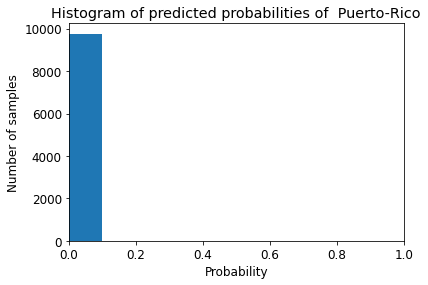

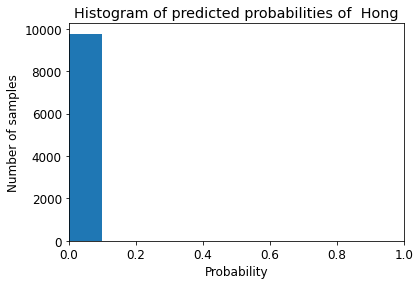

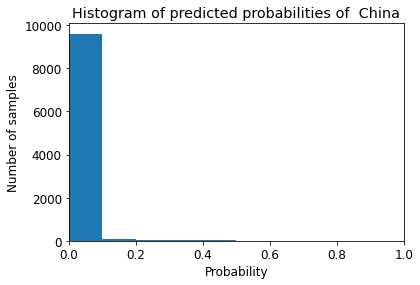

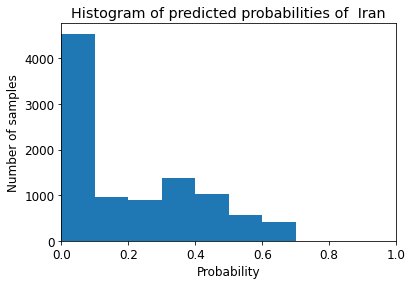

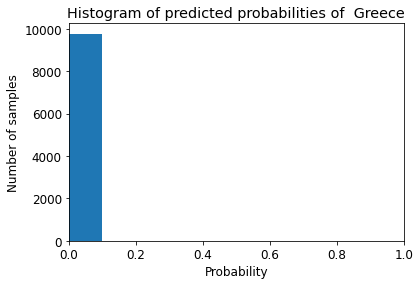

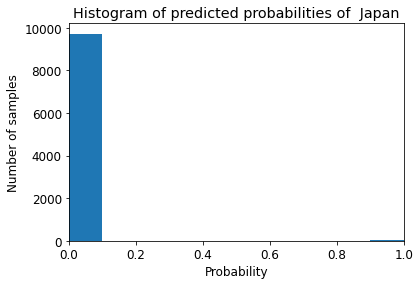

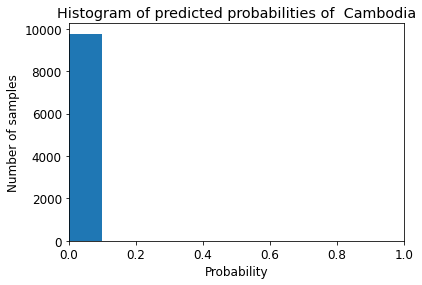

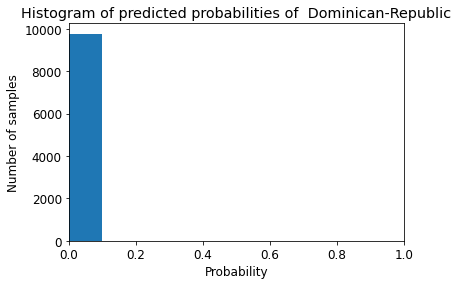

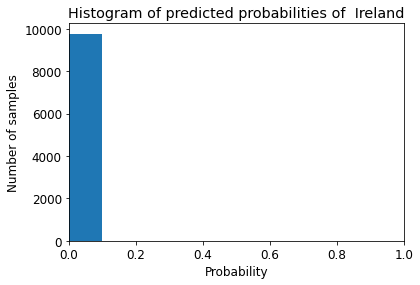

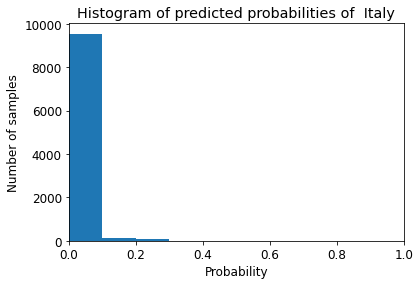

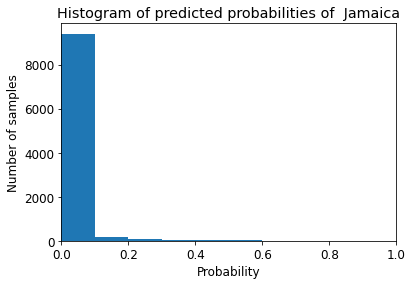

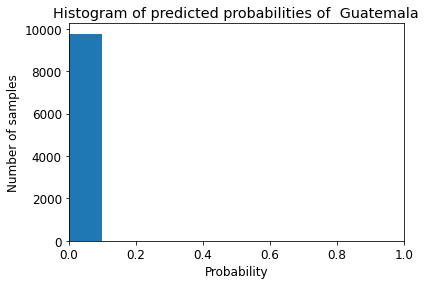

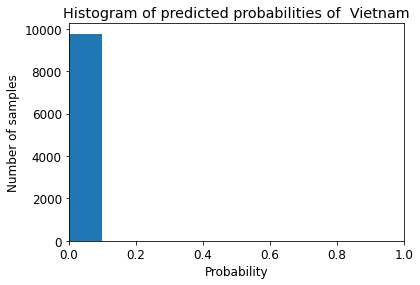

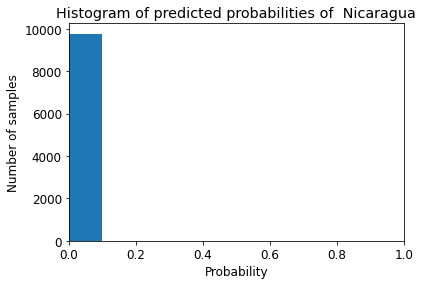

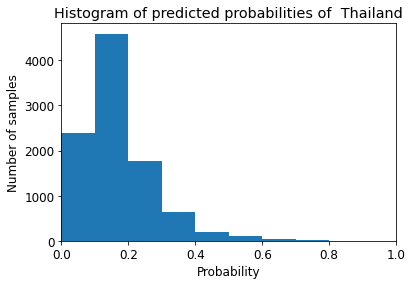

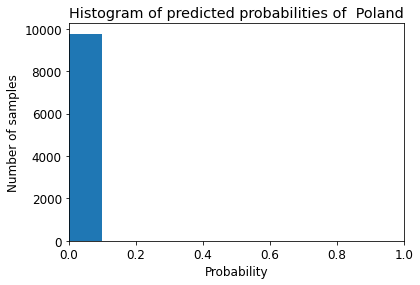

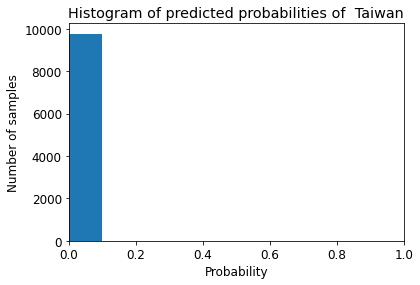

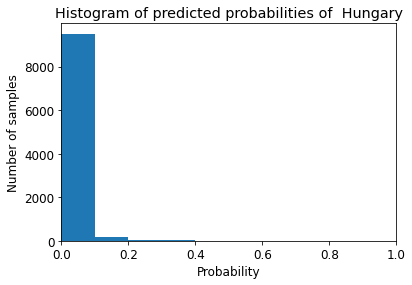

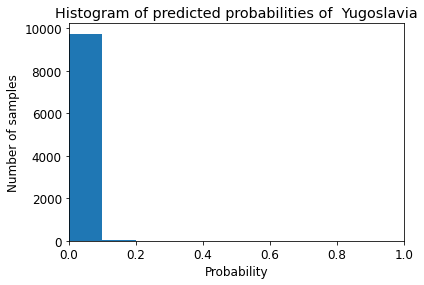

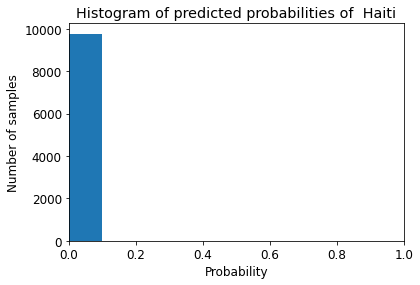

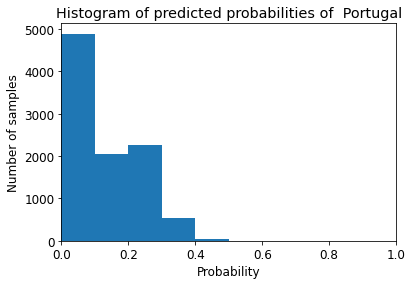

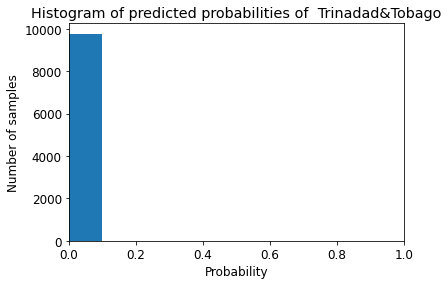

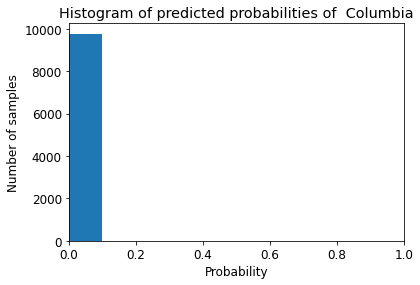

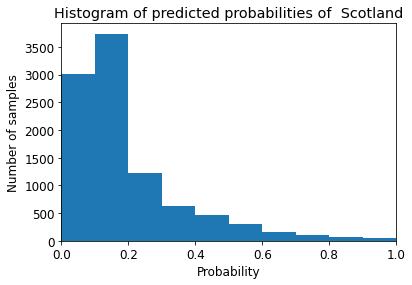

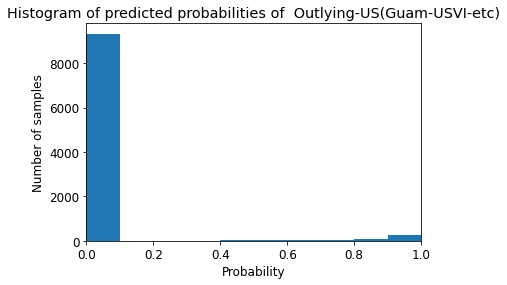

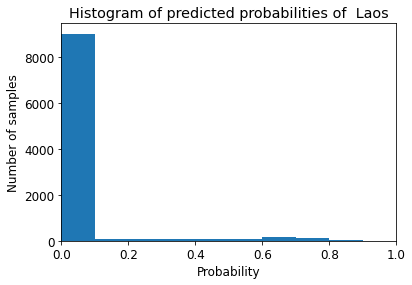

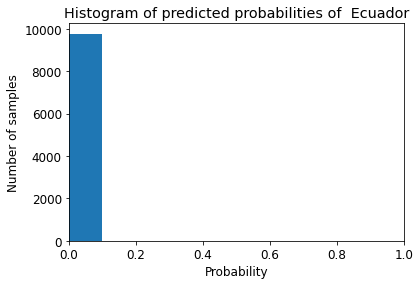

In [653]:
country = y_test.unique()
for i in range(len(country)):
    plt.rcParams['font.size'] = 12
    plt.hist(gnb.predict_proba(X_test)[:, i], bins = 10, range=(0,1))
    plt.title('Histogram of predicted probabilities of ' + country[i])
    plt.xlim(0,1)
    plt.xlabel('Probability')
    plt.ylabel('Number of samples')
    plt.grid
    plt.show()

 **WNIOSKI** 
 
 Po zrealizowaniu zadan z laboratorium nr. 9, doszedlem do wniosku ze, im więcej mamy przebadanych próbek treningowych tym mamy większa szanse na lepsze dopasowanie naszych danych. Zaistniala tendencje dobrze obrazuja histogramy. 